<a href="https://colab.research.google.com/github/mahmud-nobe/Cluster-Membership/blob/master/NGC_2264/NGC_2264.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Import Necessary Packages and download the csv files

#### Importing packages

In [2]:
# import packages
import pandas as pd
import pandas_profiling as pd_prof
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# for downloading file
from google.colab import files

## Use random forest to create and evaluate new model
from sklearn.ensemble import RandomForestRegressor

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
!pip install astroquery

     |████████████████████████████████| 4.5MB 9.5MB/s 
     |████████████████████████████████| 2.7MB 50.1MB/s 
  Created wheel for astroquery: filename=astroquery-0.4-cp36-none-any.whl size=3582510 sha256=ffe8ab72a0ff300137a70ed31559da2e567b1930d6ff6e2ab806eac6906fe2c9
  Stored in directory: /root/.cache/pip/wheels/a3/6d/9d/f6ceddc68de0e4b7a64b56d6e8c8075e6ef6377ec9c05ce128
Successfully built astroquery


In [0]:
# import astroquery
import astropy.units as u
import astropy.coordinates as coord
from astroquery.gaia import Gaia
from astroquery.vizier import Vizier


Created TAP+ (v1.2.1) - Connection:
	Host: gea.esac.esa.int
	Use HTTPS: True
	Port: 443
	SSL Port: 443
Created TAP+ (v1.2.1) - Connection:
	Host: geadata.esac.esa.int
	Use HTTPS: True
	Port: 443
	SSL Port: 443


#### Finding GAIA Data

In [0]:
## making a GAIA cone_search of 30m radius around NGC2264 center

coordinate = coord.SkyCoord.from_name('NGC2264')
print(coordinate)
radius = u.Quantity(0.5, u.deg)
j = Gaia.cone_search_async(coordinate, radius)
r = j.get_results()
print(type(r))

<SkyCoord (ICRS): (ra, dec) in deg
    (100.24166667, 9.895)>
INFO: Query finished. [astroquery.utils.tap.core]
<class 'astropy.table.table.Table'>


In [0]:
## save the ASCII table as a panadas dataframe
all_stars = r.to_pandas()
all_stars

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2882: TableReplaceWarning: converted column 'priam_flags' from integer to float
  exec(code_obj, self.user_global_ns, self.user_ns)
/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2882: TableReplaceWarning: converted column 'flame_flags' from integer to float
  exec(code_obj, self.user_global_ns, self.user_ns)


,solution_id,designation,source_id,random_index,ref_epoch,ra,ra_error,dec,dec_error,parallax,parallax_error,parallax_over_error,pmra,pmra_error,pmdec,pmdec_error,ra_dec_corr,ra_parallax_corr,ra_pmra_corr,ra_pmdec_corr,dec_parallax_corr,dec_pmra_corr,dec_pmdec_corr,parallax_pmra_corr,parallax_pmdec_corr,pmra_pmdec_corr,astrometric_n_obs_al,astrometric_n_obs_ac,astrometric_n_good_obs_al,astrometric_n_bad_obs_al,astrometric_gof_al,astrometric_chi2_al,astrometric_excess_noise,astrometric_excess_noise_sig,astrometric_params_solved,astrometric_primary_flag,astrometric_weight_al,astrometric_pseudo_colour,astrometric_pseudo_colour_error,mean_varpi_factor_al,...,phot_rp_mean_flux,phot_rp_mean_flux_error,phot_rp_mean_flux_over_error,phot_rp_mean_mag,phot_bp_rp_excess_factor,phot_proc_mode,bp_rp,bp_g,g_rp,radial_velocity,radial_velocity_error,rv_nb_transits,rv_template_teff,rv_template_logg,rv_template_fe_h,phot_variable_flag,l,b,ecl_lon,ecl_lat,priam_flags,teff_val,teff_percentile_lower,teff_percentile_upper,a_g_val,a_g_percentile_lower,a_g_percentile_upper,e_bp_min_rp_val,e_bp_min_rp_percentile_lower,e_bp_min_rp_percentile_upper,flame_flags,radius_val,radius_percentile_lower,radius_percentile_upper,lum_val,lum_percentile_lower,lum_percentile_upper,datalink_url,epoch_photometry_url,dist
0,1635721458409799680,b'Gaia DR2 3326740861276259712',3326740861276259712,1365441235,2015.5,100.243956,0.279077,9.895051,0.338835,-6.363450,0.453980,-14.017026,-1.800098,0.465340,-6.549197,0.395891,-0.027930,-0.381382,-0.265434,0.435133,-0.707267,0.011102,-0.232205,0.354407,-0.090069,-0.305690,107,107,89,18,21.666466,791.063416,0.768447,73.128166,31,False,1.647182,1.958272,0.091477,-0.300088,...,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,b'NOT_AVAILABLE',202.936733,2.197765,100.365773,-13.176377,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,b'https://gea.esac.esa.int/data-server/datalin...,b'',0.002250
1,1635721458409799680,b'Gaia DR2 3326740865570982400',3326740865570982400,911205744,2015.5,100.244416,0.523372,9.895739,0.496103,-0.784504,0.624335,-1.256544,-4.384980,0.991793,-6.574989,0.845571,-0.094483,0.201876,-0.028343,0.144926,-0.282828,0.020784,-0.170535,0.376963,0.019215,-0.000028,170,170,159,11,202.745163,101416.773438,2.757565,2478.627828,31,False,0.116784,1.690997,0.164906,-0.065167,...,8.760636e+07,398875.820038,219.633179,4.905581,1.017091,0,-0.378240,0.017767,-0.396007,NaN,NaN,0,NaN,NaN,NaN,b'NOT_AVAILABLE',202.936327,2.198482,100.366186,-13.175658,110101.0,9705.000000,8418.333008,9985.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,b'https://gea.esac.esa.int/data-server/datalin...,b'',0.002803
2,1635721458409799680,b'Gaia DR2 3326740865568919040',3326740865568919040,1396358324,2015.5,100.244941,0.598125,9.898119,0.510224,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.211070,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,44,0,44,0,13.614263,322.398376,1.820949,30.112861,3,False,0.264112,1.641529,0.160584,-0.200346,...,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,b'NOT_AVAILABLE',202.934444,2.200029,100.366538,-13.173247,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,b'https://gea.esac.esa.int/data-server/datalin...,b'',0.004486
3,1635721458409799680,b'Gaia DR2 3326741067438961664',3326741067438961664,1025584172,2015.5,100.241715,0.049001,9.899756,0.052610,1.286984,0.064376,19.991558,-1.463974,0.099293,-3.628493,0.089287,-0.083009,0.061895,-0.203724,0.138530,-0.572859,-0.000420,-0.285847,0.180690,0.150106,-0.020889,143,0,143,0,11.385525,425.318573,0.304088,12.811090,31,False,8.402239,1.500643,0.012230,-0.026078,...,3.227904e+04,1155.900454,27.925447,13.489618,1.411567,0,1.374199,0.503114,0.871085,NaN,NaN,0,NaN,NaN,NaN,b'NOT_AVAILABLE',202.931534,2.197949,100.363161,-13.171844,102001.0,4720.549805,4425.000000,5016.100098,NaN,NaN,NaN,NaN,NaN,NaN,200111.0,1.466251,1.298557,1.668657,0.961793,0.859278,1.064309,b'https://gea.esac.esa.int/data-server/datalin...,b'',0.004763
4,1635721458409799680,b'G

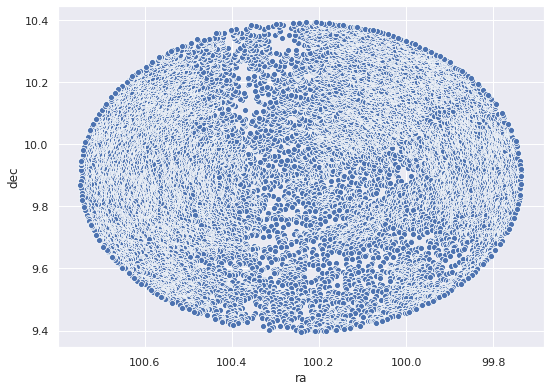

In [0]:
## plotting the skyplot 

sns.set(rc={'figure.figsize':(8.7,6.27)})

skyplot = sns.scatterplot(all_stars['ra'], all_stars['dec'])
skyplot.invert_xaxis()

#### Finding Cantat Data

In [0]:
#### Finding Cantat catalogue

catalog_list = Vizier.find_catalogs('Cantat')
{k:v.description for k,v in catalog_list.items()}

{'I/349': 'StarHorse, Gaia DR2 photo-astrometric distances (Anders+, 2019)',
 'J/A+A/561/A94': 'Velocities and photometry in Trumpler 20 (Donati+, 2014)',
 'J/A+A/564/A133': 'Gaia FGK benchmark stars: metallicity (Jofre+, 2014)',
 'J/A+A/569/A17': 'Gaia-ESO Survey: NGC6705 (Cantat-Gaudin+, 2014)',
 'J/A+A/582/A81': 'Gaia FGK benchmark stars: abundances (Jofre+, 2015)',
 'J/A+A/588/A120': 'Equivalent widths in 10 open clusters (Cantat-Gaudin+, 2016)',
 'J/A+A/591/A37': 'Gaia-ESO Survey. Parameters for cluster members (Jacobson+, 2016)',
 'J/A+A/597/A10': 'South Ecliptic Pole stars radial velocities (Fremat+, 2017)',
 'J/A+A/598/A68': 'Gaia-ESO Survey. Trumpler 23 (Overbeek+, 2017)',
 'J/A+A/601/A19': 'Gaia DR1 open cluster members (Gaia Collaboration+, 2017)',
 'J/A+A/603/A2': 'Gaia-ESO Survey abundances radial distribution (Magrini+, 2017)',
 'J/A+A/605/A79': 'TGAS Cepheids and RR Lyrae stars (Gaia Collaboration+, 2017)',
 'J/A+A/615/A49': 'TGAS stars membership in 128 open clusters (C

In [0]:
## cheking the tables in the GAIA DR2 paper

Vizier.ROW_LIMIT = -1
catalogs = Vizier.get_catalogs(catalog_list['J/A+A/633/A99'])
catalogs

TableList with 2 tables:
	'0:J/A+A/633/A99/table1' with 20 column(s) and 1481 row(s) 
	'1:J/A+A/633/A99/members' with 13 column(s) and 435833 row(s) 

In [0]:
## saving the whole cantat table 
## comment out the next two line if you want to save the full cantat table

# cantat_all = catalogs['J/A+A/633/A99/members'].to_pandas()
# cantat_all.to_csv('cantat_all.csv')

In [0]:
# help(Vizier)

In [0]:
## saving only NGC 2264 data from Cantat

cantat_2264 = Vizier(catalog = 'J/A+A/633/A99/members', row_limit = -1).query_constraints(Cluster="NGC_2264")
cantat_2264 = cantat_2264[0].to_pandas()
cantat_2264

,RA_ICRS,DE_ICRS,Source,Plx,pmRA,pmDE,RV,Gmag,BP-RP,Proba,Cluster,_RA.icrs,_DE.icrs
0,100.288919,9.935567,3326741415326788480,1.3254,-1.851,-4.220,NaN,16.416100,3.1947,1.0,b'NGC_2264',100.288927,9.935585
1,100.268700,9.870169,3326739933563070720,1.3051,-0.975,-4.047,NaN,17.872499,2.0718,0.7,b'NGC_2264',100.268704,9.870186
2,100.321455,9.894364,3326740418894376704,1.2577,-1.297,-3.914,NaN,17.051701,2.4179,0.8,b'NGC_2264',100.321461,9.894381
3,100.293254,9.883825,3326740006577519360,1.1663,-1.773,-4.213,NaN,9.904700,-0.0007,0.8,b'NGC_2264',100.293262,9.883843
4,100.229922,9.847141,3326716397142282240,1.2713,-1.759,-2.658,NaN,15.305900,1.7208,0.1,b'NGC_2264',100.229930,9.847153
...,...,...,...,...,...,...,...,...,...,...,...,...,...
181,100.139414,9.950729,3326929839837216640,1.1883,-1.923,-4.212,NaN,17.801300,2.6959,0.7,b'NGC_2264',100.139422,9.950747
182,100.240944,9.941617,3326929225657356288,1.3572,-1.452,-3.866,NaN,13.435300,1.1690,1.0,b'NGC_2264',100.240950,9.941634
183,100.190391,9.995125,3326930393888460288,1.5371,-1.218,-4.083,NaN,17.504801,2.3604,0.7,b'NGC_2264',100.190396,9.995143
184,100.223620,9.966662,3326929500535262464,1.4464,-1.454,-3.649,NaN,16.329500,2.0670,1.0,b'NGC_2264',100.223627,9.966677


In [0]:
# renaming the cantat table to match it with gaia_data
cantat_2264 = cantat_2264.rename(columns={'Source':'source_id',
                                          'Proba':'PMemb'})


In [0]:
# taking the subset of only source_id and PMemb
cantat_2264 = cantat_2264.loc[:,['source_id', 'PMemb']]


In [0]:
# join the two table on source_id
cantat_2264 = all_stars.join(cantat_2264.set_index('source_id'), on='source_id')

In [0]:
# dropping the rows, where we don't have PMemb 
# (i.e. the source id was not in the cantat table)
cantat_2264 = cantat_2264.dropna(subset=['PMemb'])
cantat_2264

,solution_id,designation,source_id,random_index,ref_epoch,ra,ra_error,dec,dec_error,parallax,parallax_error,parallax_over_error,pmra,pmra_error,pmdec,pmdec_error,ra_dec_corr,ra_parallax_corr,ra_pmra_corr,ra_pmdec_corr,dec_parallax_corr,dec_pmra_corr,dec_pmdec_corr,parallax_pmra_corr,parallax_pmdec_corr,pmra_pmdec_corr,astrometric_n_obs_al,astrometric_n_obs_ac,astrometric_n_good_obs_al,astrometric_n_bad_obs_al,astrometric_gof_al,astrometric_chi2_al,astrometric_excess_noise,astrometric_excess_noise_sig,astrometric_params_solved,astrometric_primary_flag,astrometric_weight_al,astrometric_pseudo_colour,astrometric_pseudo_colour_error,mean_varpi_factor_al,...,phot_rp_mean_flux_error,phot_rp_mean_flux_over_error,phot_rp_mean_mag,phot_bp_rp_excess_factor,phot_proc_mode,bp_rp,bp_g,g_rp,radial_velocity,radial_velocity_error,rv_nb_transits,rv_template_teff,rv_template_logg,rv_template_fe_h,phot_variable_flag,l,b,ecl_lon,ecl_lat,priam_flags,teff_val,teff_percentile_lower,teff_percentile_upper,a_g_val,a_g_percentile_lower,a_g_percentile_upper,e_bp_min_rp_val,e_bp_min_rp_percentile_lower,e_bp_min_rp_percentile_upper,flame_flags,radius_val,radius_percentile_lower,radius_percentile_upper,lum_val,lum_percentile_lower,lum_percentile_upper,datalink_url,epoch_photometry_url,dist,PMemb
3,1635721458409799680,b'Gaia DR2 3326741067438961664',3326741067438961664,1025584172,2015.5,100.241715,0.049001,9.899756,0.052610,1.286984,0.064376,19.991558,-1.463974,0.099293,-3.628493,0.089287,-0.083009,0.061895,-0.203724,0.138530,-0.572859,-0.000420,-0.285847,0.180690,0.150106,-0.020889,143,0,143,0,11.385525,425.318573,0.304088,12.811090,31,False,8.402239,1.500643,0.012230,-0.026078,...,1155.900454,27.925447,13.489618,1.411567,0,1.374199,0.503114,0.871085,NaN,NaN,0,NaN,NaN,NaN,b'NOT_AVAILABLE',202.931534,2.197949,100.363161,-13.171844,102001.0,4720.549805,4425.000000,5016.100098,NaN,NaN,NaN,NaN,NaN,NaN,200111.0,1.466251,1.298557,1.668657,0.961793,0.859278,1.064309,b'https://gea.esac.esa.int/data-server/datalin...,b'',0.004763,1.0
5,1635721458409799680,b'Gaia DR2 3326740865570981632',3326740865570981632,1521413039,2015.5,100.245557,0.038982,9.900196,0.038836,1.362735,0.045918,29.677427,-1.137068,0.079773,-3.588939,0.074279,0.012196,-0.038531,-0.197566,0.162975,-0.433419,0.086858,-0.276304,0.140726,0.135813,-0.020499,159,159,156,3,12.263560,478.664429,0.067057,1.356665,31,True,110.686615,1.704489,0.010583,-0.030650,...,702.854468,719.487610,10.502198,1.172351,0,0.343633,0.126979,0.216654,NaN,NaN,0,NaN,NaN,NaN,b'NOT_AVAILABLE',202.932872,2.201518,100.367005,-13.171131,100001.0,7839.666504,7700.000000,8181.666504,0.600,0.1560,1.0341,0.3433,0.0770,0.5181,200111.0,2.492503,2.288481,2.583743,21.142500,20.141113,22.143887,b'https://gea.esac.esa.int/data-server/datalin...,b'',0.006458,0.9
8,1635721458409799680,b'Gaia DR2 3326740964359745920',3326740964359745920,238254446,2015.5,100.232937,0.043918,9.898147,0.044957,1.248683,0.052859,23.623098,-1.432188,0.086068,-3.728367,0.076559,-0.064223,-0.099656,-0.225813,0.266703,-0.460557,0.141547,-0.359061,0.218600,0.111144,-0.075713,164,0,163,1,1.117678,177.989960,0.075689,0.373744,31,False,9.581892,1.381862,0.011180,-0.008528,...,119.420675,81.224869,14.794998,1.426720,0,1.878511,0.855293,1.023218,NaN,NaN,0,NaN,NaN,NaN,b'NOT_AVAILABLE',202.929017,2.189521,100.354423,-13.174077,100001.0,4027.333252,3858.000000,4257.020020,NaN,NaN,NaN,NaN,NaN,NaN,200111.0,1.247874,1.116849,1.359820,0.369068,0.334995,0.403141,b'https://gea.esac.esa.int/data-server/datalin...,b'',0.009165,1.0
9,1635721458409799680,b'Gaia DR2 3326740861280539136',3326740861280539136,667918271,2015.5,100.248924,0.032822,9.901716,0.032414,1.332304,0.040609,32.807835,-2.016628,0.074140,-3.112353,0.080114,-0.017695,-0.143776,-0.059924,0.023423,-0.409806,0.074095,-0.174889,-0.038104,0.321486,-0.359434,143,0,143,0,0.018795,137.645889,0.000000,0.000000,31,False,20.898325,1.428460,0.008630,-0.085661,...,318.958301,55.458710,14.142661,1.401709,0,1.642935,0.698737,0.944198,NaN

In [0]:
# saving both cantat and Gaia files as csv
# if you want to save, comment out the next two lines

cantat_2264.to_csv('NGC_2264_cantat.csv')
# all_stars.to_csv('NGC_2264_Gaia_30m.csv')

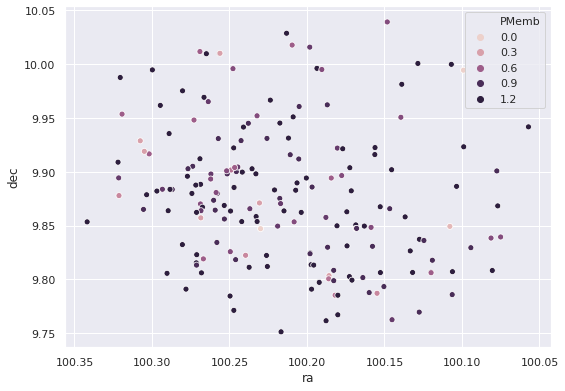

In [0]:
## plotting the skyplot 

skyplot = sns.scatterplot(cantat_2264['ra'], cantat_2264['dec'], hue = cantat_2264['PMemb'])
skyplot.invert_xaxis()

### Examining the Training Data

Separating the predictors (features) and the output (target, here PMemb) from the dataset and train the random forest model.

In [0]:
# import member dataset
member = cantat_2264

In [0]:
# Examining the descriptive statistics of each column
# (Notice BP-RP column has 9 less observation)
member.describe()

,solution_id,source_id,random_index,ref_epoch,ra,ra_error,dec,dec_error,parallax,parallax_error,parallax_over_error,pmra,pmra_error,pmdec,pmdec_error,ra_dec_corr,ra_parallax_corr,ra_pmra_corr,ra_pmdec_corr,dec_parallax_corr,dec_pmra_corr,dec_pmdec_corr,parallax_pmra_corr,parallax_pmdec_corr,pmra_pmdec_corr,astrometric_n_obs_al,astrometric_n_obs_ac,astrometric_n_good_obs_al,astrometric_n_bad_obs_al,astrometric_gof_al,astrometric_chi2_al,astrometric_excess_noise,astrometric_excess_noise_sig,astrometric_params_solved,astrometric_weight_al,astrometric_pseudo_colour,astrometric_pseudo_colour_error,mean_varpi_factor_al,astrometric_matched_observations,visibility_periods_used,...,phot_bp_mean_mag,phot_rp_n_obs,phot_rp_mean_flux,phot_rp_mean_flux_error,phot_rp_mean_flux_over_error,phot_rp_mean_mag,phot_bp_rp_excess_factor,phot_proc_mode,bp_rp,bp_g,g_rp,radial_velocity,radial_velocity_error,rv_nb_transits,rv_template_teff,rv_template_logg,rv_template_fe_h,l,b,ecl_lon,ecl_lat,priam_flags,teff_val,teff_percentile_lower,teff_percentile_upper,a_g_val,a_g_percentile_lower,a_g_percentile_upper,e_bp_min_rp_val,e_bp_min_rp_percentile_lower,e_bp_min_rp_percentile_upper,flame_flags,radius_val,radius_percentile_lower,radius_percentile_upper,lum_val,lum_percentile_lower,lum_percentile_upper,dist,PMemb
count,1.860000e+02,1.860000e+02,1.860000e+02,186.0,186.000000,186.000000,186.000000,186.000000,186.000000,186.000000,186.000000,186.000000,186.000000,186.000000,186.000000,186.000000,186.000000,186.000000,186.000000,186.000000,186.000000,186.000000,186.000000,186.000000,186.000000,186.000000,186.000000,186.000000,186.000000,186.000000,186.000000,186.000000,186.000000,186.0,186.000000,186.000000,186.000000,186.000000,186.000000,186.000000,...,181.000000,186.000000,1.810000e+02,181.000000,181.000000,181.000000,181.000000,186.000000,181.000000,181.000000,181.000000,3.000000,3.000000,186.000000,3.000000,3.000000,3.0,186.000000,186.000000,186.000000,186.000000,144.000000,144.000000,144.000000,144.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,128.0,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,186.000000,186.000000
mean,1.635721e+18,3.326784e+18,8.280865e+08,2015.5,100.213468,0.072569,9.878067,0.071833,1.351573,0.082092,21.600460,-1.713496,0.141594,-3.743843,0.125631,-0.124861,-0.013726,-0.229716,0.284783,-0.384964,0.183260,-0.358689,0.201911,0.089182,-0.101047,152.795699,16.935484,151.849462,0.946237,4.115653,297.708893,0.212232,4.696803,31.0,28.146080,1.399801,0.018506,-0.034812,17.408602,10.634409,...,16.386187,15.182796,1.233644e+05,344.702351,186.840714,14.525518,1.473558,0.129032,1.860670,0.859732,1.000938,17.663946,6.709235,0.102151,5833.333496,3.833333,0.0,202.938125,2.163288,100.336265,-13.195483,100556.638889,4531.785645,4245.857422,4903.776855,1.747458,1.442371,1.986919,0.877488,0.713944,1.003771,200111.0,1.408720,1.217725,1.548704,1.195102,1.119066,1.271138,0.081876,0.862366
std,0.000000e+00,8.928187e+13,5.066211e+08,0.0,0.061261,0.039365,0.063839,0.039039,0.098563,0.044521,10.954170,0.445249,0.075890,0.300878,0.066840,0.170140,0.137864,0.135643,0.134800,0.126800,0.131831,0.117655,0.115029,0.110401,0.184023,17.309931,47.414402,17.351655,1.487720,8.044185,624.008545,0.227853,18.451157,0.0,72.081253,0.133535,0.009988,0.079043,1.949284,0.678392,...,2.409868,3.662657,4.757823e+05,939.250760,185.163849,1.783509,0.223517,0.408711,0.683421,0.381192,0.347672,6.235787,4.756371,0.808934,288.675140,0.577350,0.0,0.057887,0.066118,0.061034,0.064705,898.928007,1413.615845,1237.766357,1462.936646,0.987902,0.909715,1.042373,0.494933,0.455351,0.527763,0.0,0.618332,0.618088,0.611171,3.740212,3.529193,3.951503,0.045190,0.208165
min,1.635721e+18,3.326712e+18,5.929410e+05,2015.5,100.057096,0.023724,9.751314,0.022577,1.092609,0.026016,6.027352,-3.389699,0.045983,-5.199818,0.041781,-0.960296,-0.685270,-0.885211,-0.377267,-0.702543,-0.271878,-0.933394,-0.694126,-0.667703,-0.896725,105.000000,0.000000,101.000000,0.000000,-6.4971

In [0]:
# correlation of PMemb with other variables
member.corr().PMemb.dropna().sort_values()

rv_template_teff          -0.381246
pmdec_error               -0.376557
astrometric_sigma5d_max   -0.373716
pmra_error                -0.366275
ra_error                  -0.363609
                             ...   
phot_rp_n_obs              0.153700
parallax_over_error        0.275752
rv_template_logg           0.381246
radial_velocity_error      0.990325
PMemb                      1.000000
Name: PMemb, Length: 88, dtype: float64

In [0]:
### adding their distance from the center of the clusters

## NGC 2264
center = coord.SkyCoord.from_name('NGC2264')
center_ra, center_dec = center.ra.degree, center.dec.degree
distance = np.sqrt( (member['ra'] - center_ra)**2 + (member['dec'] - center_dec)**2 )
member['dist_2264_center'] = distance

In [0]:
# Choosing the predictors
# Usual Parameters

feature_columns = ['ra', 'dec', 'ra_error', 'dec_error', 
                   'parallax', 'parallax_error', 'parallax_over_error',
                   'pmra', 'pmra_error', 'pmdec', 'pmdec_error',
                   'phot_g_mean_mag', 'bp_rp', 'dist_2264_center']

features = member.loc[:,feature_columns]
targets = member['PMemb']

In [0]:
# Dropping the NULL values from the using training set
# adding features and targets in a training set
training_set = pd.concat((features, targets), axis=1)

# dropping NA
training_set = training_set.dropna()

# finding where dtype is float64 as the built-in radom forest package 
# don't take 64-bit-float
float64_data = np.where(training_set.dtypes == 'float64')[0] 

# change the data type to float32 from float64
training_set.iloc[:, float64_data] = training_set.iloc[:, float64_data].astype('float32')


# set features, targets again
features, targets = training_set.iloc[:,:-1], training_set.iloc[:,-1]

features.describe()

,ra,dec,ra_error,dec_error,parallax,parallax_error,parallax_over_error,pmra,pmra_error,pmdec,pmdec_error,phot_g_mean_mag,bp_rp,dist_2264_center
count,181.000000,181.000000,181.000000,181.000000,181.000000,181.000000,181.000000,181.000000,181.000000,181.000000,181.000000,181.000000,181.000000,181.000000
mean,100.213303,9.877636,0.071799,0.071049,1.352903,0.081154,21.877619,-1.701177,0.139875,-3.745869,0.123793,15.526462,1.860670,0.082364
std,0.061108,0.063623,0.039569,0.039205,0.098011,0.044676,10.967632,0.425166,0.076069,0.300932,0.066517,2.112517,0.683421,0.045524
min,100.057098,9.751314,0.023724,0.022577,1.092609,0.026016,6.027352,-3.213657,0.045983,-5.199818,0.041781,8.111469,-0.198882,0.004757
25%,100.172607,9.826504,0.039457,0.039054,1.298197,0.045546,12.966052,-1.855648,0.077942,-3.913778,0.069943,14.998798,1.635192,0.041283
50%,100.217506,9.871068,0.061813,0.059222,1.352404,0.066472,19.991558,-1.623114,0.119541,-3.737772,0.105352,15.958431,1.936859,0.078289
75%,100.261948,9.915905,0.093635,0.096390,1.412481,0.110852,29.224421,-1.459141,0.183187,-3.584583,0.162539,16.953516,2.313512,0.115424
max,100.341797,10.039320,0.190055,0.197718,1.613808,0.205766,53.743515,-0.620285,0.356253,-2.657968,0.311450,17.988478,3.194711,0.190415


In [0]:
# Profile report of the full training_set
# pd_prof.ProfileReport(training_set)

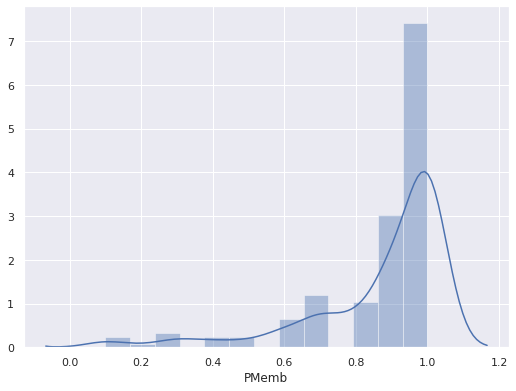

In [0]:
# histogram of PMemb in the training data
sns.distplot(training_set['PMemb'])
plt.show()

In [0]:
# Probable members (PMemb >= 0.5) in this dataset
len(training_set[training_set['PMemb'] >= 0.5])

170

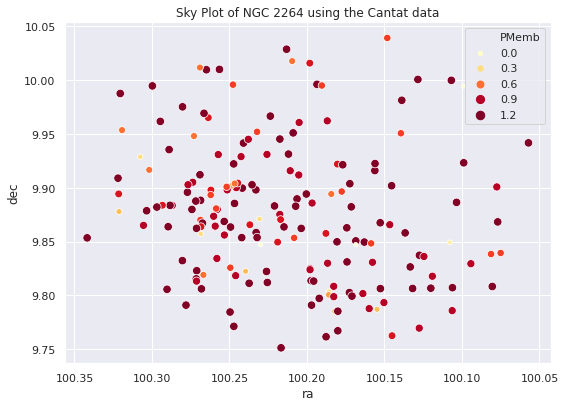

In [0]:
sns.set(rc={'figure.figsize':(8.7,6.27)})

skyplot = sns.scatterplot(x = 'ra', y='dec', hue='PMemb', palette='YlOrRd', size = 'PMemb', data = training_set)
skyplot.invert_xaxis()
plt.title('Sky Plot of NGC 2264 using the Cantat data')
plt.show()

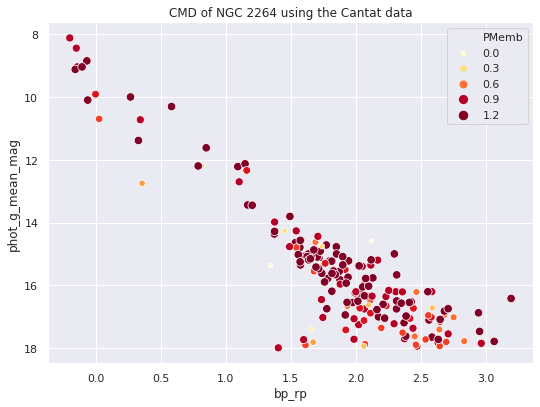

In [0]:
# CMD marked with the membership probabilities of the stars 
# (PMemb >= 0.5 stars are the probable stars)
cmd = sns.scatterplot(x = 'bp_rp', y='phot_g_mean_mag', hue='PMemb', palette='YlOrRd', size = 'PMemb', data = training_set)
cmd.invert_yaxis()
plt.title('CMD of NGC 2264 using the Cantat data')
plt.show()

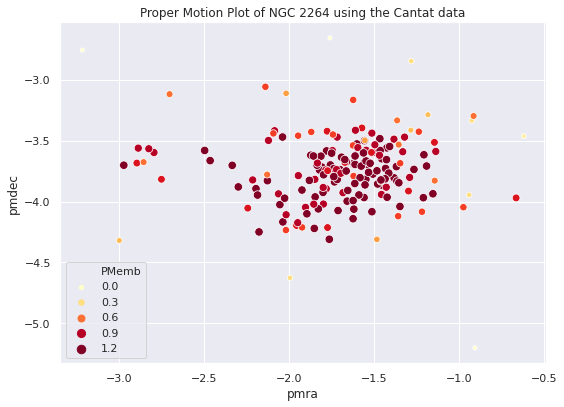

In [0]:
# proper motion plot marked with the membership probabilities of the stars 

pm_plot = sns.scatterplot(x = 'pmra', y='pmdec', hue='PMemb', palette='YlOrRd', size = 'PMemb', data = training_set)
plt.title('Proper Motion Plot of NGC 2264 using the Cantat data')
plt.show()

In [0]:
# Use Random Forest on whole dataset using 100 different trees 
rfr = RandomForestRegressor(n_estimators = 100, oob_score = True)
rfr.fit(features, targets)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=True,
                      random_state=None, verbose=0, warm_start=False)

In [0]:
# checking the feature importance, 
# ( this is higher for a variable if the model efficiency become lower as we remove that variable)
feature_imp = pd.Series(rfr.feature_importances_, index=features.columns).sort_values(ascending = False)
feature_imp

pmdec                  0.545068
pmra                   0.125814
parallax               0.043228
parallax_over_error    0.038445
dec                    0.036049
pmdec_error            0.032979
parallax_error         0.030392
phot_g_mean_mag        0.025251
ra_error               0.022798
ra                     0.020734
pmra_error             0.020629
dist_2264_center       0.019966
bp_rp                  0.019649
dec_error              0.018998
dtype: float64

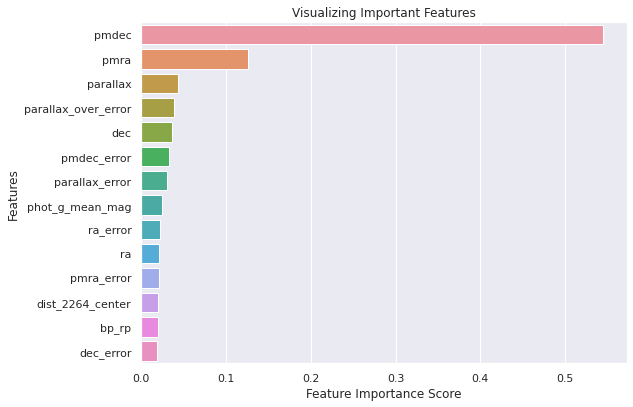

In [0]:
# plotting as a barplot

# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to the graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.show()

### Estimating the Model Accuracy in Test Data

In [0]:
# function for splitting a given dataset into training and test dataset

import random
# X = predictors, Y = target
def test_train_split(X, Y, test_ratio):
  ntest = int(len(X)*test_ratio) 
  ntrain = int(len(X) - ntest)

  # randomly select ntest number of rows from the full dataset as test_index and mark others as train_index.
  ind_test = random.sample(range(len(X)), k = ntest)
  ind_train = list(set(range(len(X))) - set(ind_test))

  # test and train dataset has the observations of test_indices and train_indices respectively
  test_X = X.iloc[ind_test]
  test_Y = Y.iloc[ind_test]

  train_X = X.iloc[ind_train]
  train_Y = Y.iloc[ind_train]

  return test_X, test_Y, train_X, train_Y

In [0]:
# splitting our dataset using 0.3 test ratio (30% test data, 70% train data)
test_features, test_targets, train_features, train_targets = test_train_split(features, targets, 0.3)


In [0]:
# train the model using only training subset
rfr.fit(train_features, train_targets)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=True,
                      random_state=None, verbose=0, warm_start=False)

In [0]:
# find the accuracy rate to predict the outcome for test subset
test_predict = rfr.predict(test_features)
rfr.score(test_features, test_targets)

0.6515361238214313

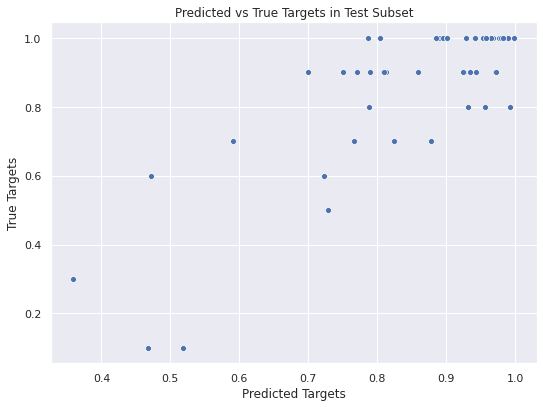

In [0]:
# plot Predicted vs True Targets in Test Subset

sns.scatterplot(test_predict, test_targets)
plt.title('Predicted vs True Targets in Test Subset')
plt.ylabel('True Targets')
plt.xlabel('Predicted Targets')
plt.show()

In [0]:
# Check with different test ratio

test_ratio = np.linspace(0.95, 0.05, 19)
print(test_ratio)

[0.95 0.9  0.85 0.8  0.75 0.7  0.65 0.6  0.55 0.5  0.45 0.4  0.35 0.3
 0.25 0.2  0.15 0.1  0.05]


In [0]:
# for each test_ratio, estimate the accuracy of the model

accuracy_rate = []

rfr = RandomForestRegressor(n_estimators = 100, oob_score = True)

for ratio in test_ratio:
  
  accuracy = 0
  for iter in range(20):
    test_features, test_targets, train_features, train_targets = test_train_split(features, targets, ratio)

    # train the model using only training subset
    rfr.fit(train_features, train_targets)

    # find the accuracy rate to predict the outcome for test subset
    test_predict = rfr.predict(test_features)
    accuracy += rfr.score(test_features, test_targets)

  accuracy_rate.append(accuracy/20)

print(accuracy_rate)

[-0.003348328080962859, 0.11013437962340764, 0.26013638952128576, 0.31081331048414235, 0.33820483688859476, 0.39097156826050494, 0.4102834426975604, 0.41396065429397966, 0.42955246822709237, 0.4769125608686333, 0.46650266522907236, 0.4815294382727567, 0.49899973780643175, 0.4435402051231951, 0.5349658555032457, 0.5068121400827812, 0.5017613716474033, 0.4011307690057356, 0.2722248721999976]


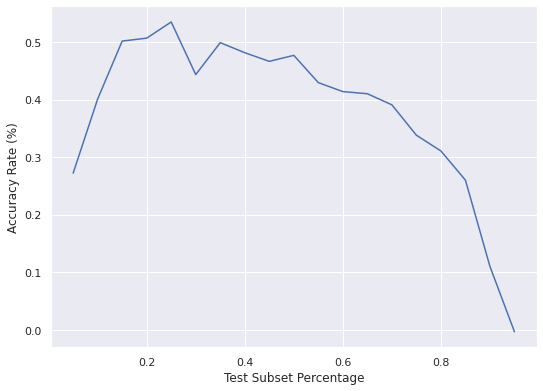

In [0]:
# plotting the accuracy rate vs test-ratio

sns.lineplot(test_ratio, accuracy_rate)
plt.xlabel('Test Subset Percentage')
plt.ylabel('Accuracy Rate (%)')
plt.show()

### Prediction of PMemb for the new stars

In [0]:
# descriptive stats
all_stars.describe()

,solution_id,source_id,random_index,ref_epoch,ra,ra_error,dec,dec_error,parallax,parallax_error,parallax_over_error,pmra,pmra_error,pmdec,pmdec_error,ra_dec_corr,ra_parallax_corr,ra_pmra_corr,ra_pmdec_corr,dec_parallax_corr,dec_pmra_corr,dec_pmdec_corr,parallax_pmra_corr,parallax_pmdec_corr,pmra_pmdec_corr,astrometric_n_obs_al,astrometric_n_obs_ac,astrometric_n_good_obs_al,astrometric_n_bad_obs_al,astrometric_gof_al,astrometric_chi2_al,astrometric_excess_noise,astrometric_excess_noise_sig,astrometric_params_solved,astrometric_weight_al,astrometric_pseudo_colour,astrometric_pseudo_colour_error,mean_varpi_factor_al,astrometric_matched_observations,visibility_periods_used,...,phot_bp_mean_flux_over_error,phot_bp_mean_mag,phot_rp_n_obs,phot_rp_mean_flux,phot_rp_mean_flux_error,phot_rp_mean_flux_over_error,phot_rp_mean_mag,phot_bp_rp_excess_factor,phot_proc_mode,bp_rp,bp_g,g_rp,radial_velocity,radial_velocity_error,rv_nb_transits,rv_template_teff,rv_template_logg,rv_template_fe_h,l,b,ecl_lon,ecl_lat,priam_flags,teff_val,teff_percentile_lower,teff_percentile_upper,a_g_val,a_g_percentile_lower,a_g_percentile_upper,e_bp_min_rp_val,e_bp_min_rp_percentile_lower,e_bp_min_rp_percentile_upper,flame_flags,radius_val,radius_percentile_lower,radius_percentile_upper,lum_val,lum_percentile_lower,lum_percentile_upper,dist
count,1.882300e+04,1.882300e+04,1.882300e+04,18823.0,18823.000000,18823.000000,18823.000000,18823.000000,14848.000000,14848.000000,14848.000000,14848.000000,14848.000000,14848.000000,14848.000000,18823.000000,14848.000000,14848.000000,14848.000000,14848.000000,14848.000000,14848.000000,14848.000000,14848.000000,14848.000000,18823.000000,18823.000000,18823.000000,18823.000000,18823.000000,18823.000000,18823.000000,18823.000000,18823.000000,18823.000000,14774.000000,14774.000000,18823.000000,18823.000000,18823.000000,...,18061.000000,18061.000000,18823.000000,1.806800e+04,18068.000000,18068.000000,18068.000000,18059.000000,18823.000000,18059.000000,18061.000000,18068.000000,102.000000,102.000000,18823.000000,102.000000,102.000000,102.000000,18823.000000,18823.000000,18823.000000,18823.000000,2827.000000,2827.000000,2827.000000,2827.000000,1258.000000,1258.000000,1258.000000,1258.000000,1258.000000,1258.000000,1539.0,1539.000000,1539.000000,1539.000000,1539.000000,1539.000000,1539.000000,18823.000000
mean,1.635721e+18,3.327693e+18,8.433677e+08,2015.5,100.252246,1.468508,9.923700,1.416197,0.580505,0.442766,4.535736,-0.278674,0.805558,-2.274934,0.748157,-0.345464,0.042057,-0.194591,0.236595,-0.366830,0.119818,-0.303115,0.238856,0.105523,-0.247621,116.983903,1.494980,116.337513,0.646390,2.725132,403.872131,0.922337,15.418916,25.087021,4.508871,1.380392,0.095720,-0.150344,13.445519,9.212293,...,42.787468,19.356543,11.176221,1.668824e+04,79.569059,100.590332,17.591995,1.764759,0.089199,1.765203,0.594654,1.170553,22.142259,2.567408,0.024013,5325.980469,3.504902,-0.102941,202.914862,2.218163,100.372031,-13.146915,101063.053767,4446.631348,4237.062988,4785.977539,1.480558,1.258891,1.750920,0.740850,0.626070,0.880374,200111.0,2.238604,1.957127,2.429755,4.416759,3.854149,4.979377,0.354240
std,0.000000e+00,4.499305e+15,4.882300e+08,0.0,0.290735,3.588410,0.233680,3.358883,1.007679,0.388423,12.007395,4.211682,0.721925,5.485824,0.699509,0.346655,0.215628,0.263427,0.236093,0.202261,0.267630,0.236001,0.151139,0.141733,0.217847,32.815099,14.002791,32.640962,1.134611,10.393350,7250.877930,1.403891,470.535212,11.428343,28.211193,0.159010,0.081759,0.165917,3.625389,1.803073,...,99.418228,1.666264,4.171125,6.779312e+05,3373.533022,155.944778,1.638264,0.494906,0.373324,0.506430,0.486948,0.267967,25.766512,3.298198,0.348589,725.071960,0.569415,0.381102,0.256851,0.265991,0.295627,0.231849,4939.061307,827.467041,796.151855,829.686768,0.983270,0.943630,1.012219,0.495878,0.472880,0.514434,0.0,3.248268,2.926001,3.480190,19.078373,17.044430,21.210123,0.109875
min,1.635721e+18,3.326606e+18,3.159970e+05,2015.5,99.734891,0.020221,9.395907,0.019586,-6.363450,0.02

In [0]:
### adding their distance from the center of the clusters

## NGC 2264
center = coord.SkyCoord.from_name('NGC2264')
center_ra, center_dec = center.ra.degree, center.dec.degree
distance = np.sqrt( (all_stars['ra'] - center_ra)**2 + (all_stars['dec'] - center_dec)**2 )
all_stars['dist_2264_center'] = distance

In [0]:
all_stars = all_stars.dropna(subset = feature_columns)

In [0]:
# select the set of predictor variables from the new dataset
new_features = all_stars.loc[:, feature_columns]
new_features = new_features.astype('float32')

In [0]:
# train the model again using all the features and targets of the previous dataset
rfr.fit(features, targets)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=True,
                      random_state=None, verbose=0, warm_start=False)

In [0]:
# estimate the membership probability of the stars
all_stars['PMemb'] = rfr.predict(new_features)
sum(all_stars['PMemb'] >= 0.5)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


1828

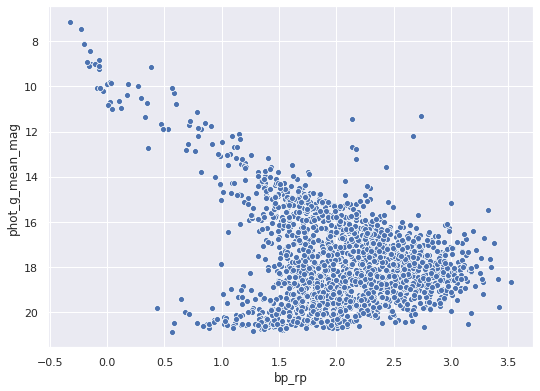

In [0]:
# CMD of probable members 

cmd = sns.scatterplot(x = 'bp_rp', y = 'phot_g_mean_mag', data = all_stars[all_stars['PMemb'] >= 0.5] )
cmd.invert_yaxis()

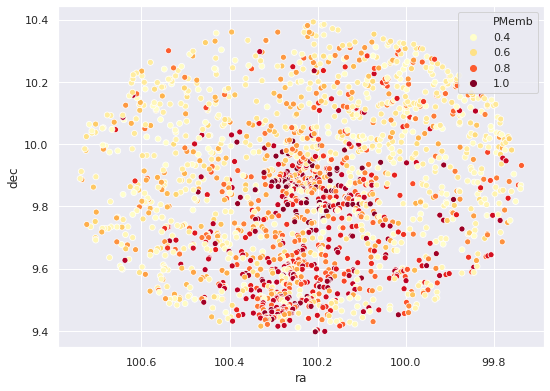

In [0]:
skyplot = sns.scatterplot(x = 'ra', y = 'dec', hue= 'PMemb', 
                      palette='YlOrRd', data = all_stars[all_stars['PMemb'] >= 0.5] )
skyplot.invert_xaxis()

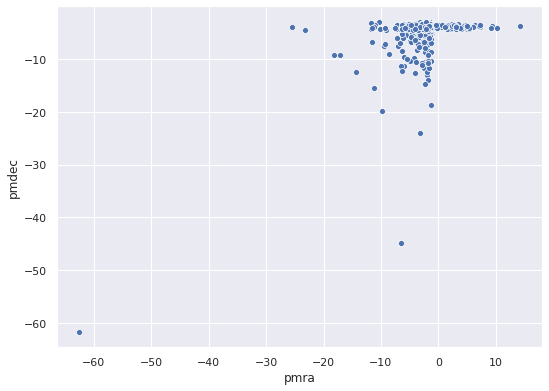

In [0]:
# pm plot
sns.scatterplot(x = 'pmra', y = 'pmdec', data = all_stars[all_stars['PMemb'] >= 0.5] )

In [0]:
potentialMember = all_stars[all_stars['PMemb'] >= 0.6]
len(potentialMember)

1067

In [0]:
potentialMember.describe()

,solution_id,source_id,random_index,ref_epoch,ra,ra_error,dec,dec_error,parallax,parallax_error,parallax_over_error,pmra,pmra_error,pmdec,pmdec_error,ra_dec_corr,ra_parallax_corr,ra_pmra_corr,ra_pmdec_corr,dec_parallax_corr,dec_pmra_corr,dec_pmdec_corr,parallax_pmra_corr,parallax_pmdec_corr,pmra_pmdec_corr,astrometric_n_obs_al,astrometric_n_obs_ac,astrometric_n_good_obs_al,astrometric_n_bad_obs_al,astrometric_gof_al,astrometric_chi2_al,astrometric_excess_noise,astrometric_excess_noise_sig,astrometric_params_solved,astrometric_weight_al,astrometric_pseudo_colour,astrometric_pseudo_colour_error,mean_varpi_factor_al,astrometric_matched_observations,visibility_periods_used,...,phot_rp_n_obs,phot_rp_mean_flux,phot_rp_mean_flux_error,phot_rp_mean_flux_over_error,phot_rp_mean_mag,phot_bp_rp_excess_factor,phot_proc_mode,bp_rp,bp_g,g_rp,radial_velocity,radial_velocity_error,rv_nb_transits,rv_template_teff,rv_template_logg,rv_template_fe_h,l,b,ecl_lon,ecl_lat,priam_flags,teff_val,teff_percentile_lower,teff_percentile_upper,a_g_val,a_g_percentile_lower,a_g_percentile_upper,e_bp_min_rp_val,e_bp_min_rp_percentile_lower,e_bp_min_rp_percentile_upper,flame_flags,radius_val,radius_percentile_lower,radius_percentile_upper,lum_val,lum_percentile_lower,lum_percentile_upper,dist,dist_2264_center,PMemb
count,1.067000e+03,1.067000e+03,1.067000e+03,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1.067000e+03,1067.0,1067.000000,1064.000000,1064.000000,1067.000000,1067.000000,1067.000000,...,1067.000000,1.067000e+03,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,14.000000,14.000000,1067.000000,14.000000,14.000000,14.0,1067.000000,1067.000000,1067.000000,1067.000000,520.000000,520.000000,520.000000,520.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,449.0,449.000000,449.000000,449.000000,449.000000,449.000000,449.000000,1067.000000,1067.000000,1067.000000
mean,1.635721e+18,3.327048e+18,8.428458e+08,2015.5,100.222971,0.194335,9.802686,0.190624,1.183906,0.217561,13.460544,-1.874186,0.384712,-3.814708,0.346661,-0.160487,0.010749,-0.227700,0.273442,-0.355372,0.158862,-0.355041,0.248681,0.100697,-0.148744,139.357076,8.096532,138.533271,0.823805,3.636333,265.735931,0.443739,5.077876e+00,31.0,16.501333,1.352054,0.048002,-0.051514,15.959700,10.324274,...,14.019681,6.045286e+04,204.756852,160.497757,15.751330,1.618271,0.045923,2.065359,0.921880,1.143480,17.290049,4.659855,0.060918,5553.571289,3.535714,0.0,203.009479,2.137219,100.351517,-13.269874,100316.661538,4446.827637,4189.597656,4832.549805,1.800156,1.519433,2.060060,0.904676,0.758081,1.038077,200111.0,1.658978,1.419968,1.824488,2.020529,1.826413,2.214644,0.277535,0.279056,0.809104
std,0.000000e+00,2.543610e+15,4.855742e+08,0.0,0.188451,0.242225,0.231660,0.243590,0.585029,0.281145,12.278178,1.770201,0.497834,0.244239,0.468628,0.190354,0.175795,0.185451,0.165498,0.165538,0.191534,0.156551,0.120059,0.119378,0.185286,22.378732,33.504488,22.203636,1.364545,7.445127,678.157654,0.603602,2.358715e+01,0.0,54.843826,0.147808,0.055376,0.099634,2.455852,0.888641,...,2.933373,4.219770e+05,1278.008346,195.341827,1.942147,0.383568,0.209417,0.638444,0.444182,0.330947,22.565912,5.149727,0.572215,821.458435,0.570569,0.0,0.232160,0.185260,0.193028,0.229869,873.775925,1239.249634,1113.750732,1261.687988,0.959490,0.914725,0.989459,0.484630,0.460075,0.505982,0.0,1.932110,1.713737,2.122717,9.278339,8.434798,10.132946,0.141084,0.141825,0.113860
min,1.635721e+18,3.326606e+18,5.929410e+05,2015.5,99.737273,0.022312,9.397287,0.020798,-2.497970,0.024437,-2.599010,-25.488159,0.042755,-4.424778,0.036123,-0.960296,-0.685270,-0.885211,-0.914024,-0.880808,-0.857107,-0.933394,-0

In [0]:
member.describe()

,solution_id,source_id,random_index,ref_epoch,ra,ra_error,dec,dec_error,parallax,parallax_error,parallax_over_error,pmra,pmra_error,pmdec,pmdec_error,ra_dec_corr,ra_parallax_corr,ra_pmra_corr,ra_pmdec_corr,dec_parallax_corr,dec_pmra_corr,dec_pmdec_corr,parallax_pmra_corr,parallax_pmdec_corr,pmra_pmdec_corr,astrometric_n_obs_al,astrometric_n_obs_ac,astrometric_n_good_obs_al,astrometric_n_bad_obs_al,astrometric_gof_al,astrometric_chi2_al,astrometric_excess_noise,astrometric_excess_noise_sig,astrometric_params_solved,astrometric_weight_al,astrometric_pseudo_colour,astrometric_pseudo_colour_error,mean_varpi_factor_al,astrometric_matched_observations,visibility_periods_used,...,phot_rp_n_obs,phot_rp_mean_flux,phot_rp_mean_flux_error,phot_rp_mean_flux_over_error,phot_rp_mean_mag,phot_bp_rp_excess_factor,phot_proc_mode,bp_rp,bp_g,g_rp,radial_velocity,radial_velocity_error,rv_nb_transits,rv_template_teff,rv_template_logg,rv_template_fe_h,l,b,ecl_lon,ecl_lat,priam_flags,teff_val,teff_percentile_lower,teff_percentile_upper,a_g_val,a_g_percentile_lower,a_g_percentile_upper,e_bp_min_rp_val,e_bp_min_rp_percentile_lower,e_bp_min_rp_percentile_upper,flame_flags,radius_val,radius_percentile_lower,radius_percentile_upper,lum_val,lum_percentile_lower,lum_percentile_upper,dist,PMemb,dist_2264_center
count,1.860000e+02,1.860000e+02,1.860000e+02,186.0,186.000000,186.000000,186.000000,186.000000,186.000000,186.000000,186.000000,186.000000,186.000000,186.000000,186.000000,186.000000,186.000000,186.000000,186.000000,186.000000,186.000000,186.000000,186.000000,186.000000,186.000000,186.000000,186.000000,186.000000,186.000000,186.000000,186.000000,186.000000,186.000000,186.0,186.000000,186.000000,186.000000,186.000000,186.000000,186.000000,...,186.000000,1.810000e+02,181.000000,181.000000,181.000000,181.000000,186.000000,181.000000,181.000000,181.000000,3.000000,3.000000,186.000000,3.000000,3.000000,3.0,186.000000,186.000000,186.000000,186.000000,144.000000,144.000000,144.000000,144.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,128.0,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,186.000000,186.000000,186.000000
mean,1.635721e+18,3.326784e+18,8.280865e+08,2015.5,100.213468,0.072569,9.878067,0.071833,1.351573,0.082092,21.600460,-1.713496,0.141594,-3.743843,0.125631,-0.124861,-0.013726,-0.229716,0.284783,-0.384964,0.183260,-0.358689,0.201911,0.089182,-0.101047,152.795699,16.935484,151.849462,0.946237,4.115653,297.708893,0.212232,4.696803,31.0,28.146080,1.399801,0.018506,-0.034812,17.408602,10.634409,...,15.182796,1.233644e+05,344.702351,186.840714,14.525518,1.473558,0.129032,1.860670,0.859732,1.000938,17.663946,6.709235,0.102151,5833.333496,3.833333,0.0,202.938125,2.163288,100.336265,-13.195483,100556.638889,4531.785645,4245.857422,4903.776855,1.747458,1.442371,1.986919,0.877488,0.713944,1.003771,200111.0,1.408720,1.217725,1.548704,1.195102,1.119066,1.271138,0.081876,0.862366,0.082478
std,0.000000e+00,8.928187e+13,5.066211e+08,0.0,0.061261,0.039365,0.063839,0.039039,0.098563,0.044521,10.954170,0.445249,0.075890,0.300878,0.066840,0.170140,0.137864,0.135643,0.134800,0.126800,0.131831,0.117655,0.115029,0.110401,0.184023,17.309931,47.414402,17.351655,1.487720,8.044185,624.008545,0.227853,18.451157,0.0,72.081253,0.133535,0.009988,0.079043,1.949284,0.678392,...,3.662657,4.757823e+05,939.250760,185.163849,1.783509,0.223517,0.408711,0.683421,0.381192,0.347672,6.235787,4.756371,0.808934,288.675140,0.577350,0.0,0.057887,0.066118,0.061034,0.064705,898.928007,1413.615845,1237.766357,1462.936646,0.987902,0.909715,1.042373,0.494933,0.455351,0.527763,0.0,0.618332,0.618088,0.611171,3.740212,3.529193,3.951503,0.045190,0.208165,0.045570
min,1.635721e+18,3.326712e+18,5.929410e+05,2015.5,100.057096,0.023724,9.751314,0.022577,1.092609,0.026016,6.027352,-3.389699,0.045983,-5.199818,0.041781,-0.960296,-0.685270,-0.885211,-0.377267,-0.702543,-0.271878,-0.933394,-0.694126,-0.667703,-0.896725,105.000000,0.000000,101.000000,0.000000,-6.49713

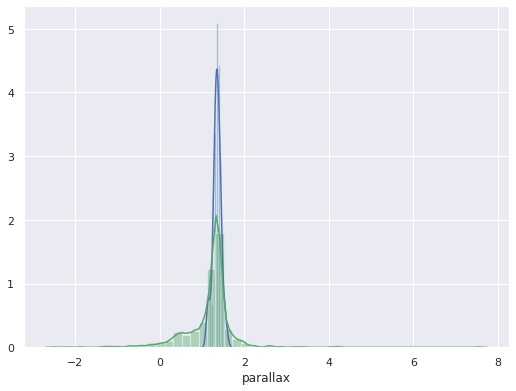

In [0]:
sns.distplot(member['parallax'], color = 'b')
sns.distplot(potentialMember['parallax'], color = 'g')

In [0]:
# saving the files as csv

# all_stars.to_csv('gaia_2264_membership_prob.csv')
potentialMember.to_csv('NGC_2264_membership_prob.csv')

### Uploading the filtered version done in TopCat

In [0]:
# remove the comments to directly upload the file from github

# potentialMember2 = pd.read_csv('https://raw.githubusercontent.com/mahmud-nobe/Cluster-Membership/master/NGC_2264/NGC_2264_membership_prob_version_6.3.csv')
# member = pd.read_csv('https://raw.githubusercontent.com/mahmud-nobe/Cluster-Membership/master/NGC_2264/NGC_2264_cantat.csv')

### Comparing the new and old probable members

In [0]:
# creating subset for the potential member in previous dataset

potential_Old_Member = member[member['PMemb'] >= 0.5]


concatenated = pd.concat([potentialMember2.assign(dataset='New_member'), potential_Old_Member.assign(dataset='Old_member')])


In [12]:
concatenated

,col1,solution_id,designation,source_id,random_index,ref_epoch,ra,ra_error,dec,dec_error,parallax,parallax_error,parallax_over_error,pmra,pmra_error,pmdec,pmdec_error,ra_dec_corr,ra_parallax_corr,ra_pmra_corr,ra_pmdec_corr,dec_parallax_corr,dec_pmra_corr,dec_pmdec_corr,parallax_pmra_corr,parallax_pmdec_corr,pmra_pmdec_corr,astrometric_n_obs_al,astrometric_n_obs_ac,astrometric_n_good_obs_al,astrometric_n_bad_obs_al,astrometric_gof_al,astrometric_chi2_al,astrometric_excess_noise,astrometric_excess_noise_sig,astrometric_params_solved,astrometric_primary_flag,astrometric_weight_al,astrometric_pseudo_colour,astrometric_pseudo_colour_error,...,phot_bp_rp_excess_factor,phot_proc_mode,bp_rp,bp_g,g_rp,radial_velocity,radial_velocity_error,rv_nb_transits,rv_template_teff,rv_template_logg,rv_template_fe_h,phot_variable_flag,l,b,ecl_lon,ecl_lat,priam_flags,teff_val,teff_percentile_lower,teff_percentile_upper,a_g_val,a_g_percentile_lower,a_g_percentile_upper,e_bp_min_rp_val,e_bp_min_rp_percentile_lower,e_bp_min_rp_percentile_upper,flame_flags,radius_val,radius_percentile_lower,radius_percentile_upper,lum_val,lum_percentile_lower,lum_percentile_upper,datalink_url,epoch_photometry_url,dist,dist_2264_center,PMemb,dataset,Unnamed: 0
0,3.0,1635721458409799680,b'Gaia DR2 3326740006577519360',3326740006577519360,338009198,2015.5,100.293254,0.051974,9.883825,0.053140,1.166296,0.061081,19.094145,-1.772968,0.099508,-4.213214,0.093444,-0.301653,0.106379,-0.293946,0.308379,-0.403827,0.127463,-0.435419,0.316915,0.172105,-0.249948,156,156,154,2,17.077967,679.16113,0.137515,5.479145,31,False,37.789845,1.775599,0.013533,...,1.151723,0,-0.000747,0.006741,-0.007487,NaN,NaN,0,NaN,NaN,NaN,b'NOT_AVAILABLE',202.968913,2.235852,100.416360,-13.184037,100001.0,9670.6670,9200.25,9831.000,0.3173,0.1884,0.4576,0.1583,0.0864,0.2110,NaN,NaN,NaN,NaN,NaN,NaN,NaN,b'https://gea.esac.esa.int/data-server/datalin...,b'',0.008433,0.008440,0.841,New_member,NaN
1,5.0,1635721458409799680,b'Gaia DR2 3326740075296996608',3326740075296996608,669586837,2015.5,100.288331,0.080591,9.883731,0.081428,1.456877,0.078880,18.469517,-1.381548,0.147312,-3.806088,0.139559,-0.523801,0.102808,-0.408580,0.511314,-0.306236,0.384220,-0.553562,0.249792,0.076708,-0.439862,157,0,155,2,3.298759,213.85217,0.288888,3.174382,31,False,3.599010,1.383417,0.018468,...,1.446566,0,2.314808,1.189182,1.125626,NaN,NaN,0,NaN,NaN,NaN,b'NOT_AVAILABLE',202.966781,2.231493,100.411398,-13.184484,100001.0,3608.0050,3417.00,4477.880,NaN,NaN,NaN,NaN,NaN,NaN,200111.0,1.125405,0.730631,1.254738,0.193366,0.171433,0.215299,b'https://gea.esac.esa.int/data-server/datalin...,b'',0.010309,0.010361,0.970,New_member,NaN
2,6.0,1635721458409799680,b'Gaia DR2 3326740002281694592',3326740002281694592,535645129,2015.5,100.296823,0.050816,9.882133,0.050554,1.347839,0.056103,24.024263,-1.478468,0.096108,-3.855786,0.091301,-0.356103,0.201527,-0.289602,0.273360,-0.386346,0.137331,-0.413178,0.230126,0.124278,-0.257241,161,161,159,2,16.836754,676.96730,0.141880,6.011601,31,False,36.901455,1.779420,0.013208,...,1.153539,1,-0.060998,-0.016715,-0.044283,NaN,NaN,0,NaN,NaN,NaN,b'NOT_AVAILABLE',202.972026,2.238207,100.420088,-13.185468,100002.0,8748.3330,7420.00,9705.000,0.0870,0.0379,0.2241,0.0435,0.0146,0.1121,NaN,NaN,NaN,NaN,NaN,NaN,NaN,b'https://gea.esac.esa.int/data-server/datalin...,b'',0.010362,0.010379,0.985,New_member,NaN
3,7.0,1635721458409799680,b'Gaia DR2 3326740075296996736',3326740075296996736,289548265,2015.5,100.286887,0.092189,9.883634,0.082626,1.443122,0.093037,15.511223,-1.464500,0.173904,-3.853637,0.155394,-0.247701,0.274339,-0.372806,0.185210,-0.295910,0.125538,-0.424320,0.115379,0.086176,-0.158110,161,0,161,0,2.295916,199.38344,0.270272,1.541566,31,False,2.265055,1.282532,0.021110,...,1.635123,0,2.294858,1.039610,1.255248,NaN,NaN,0,NaN,NaN,NaN,b'NOT_AVAILABLE',202.966218,2.230183,100.409948,-13.184684,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,b'https://gea.esac.esa.int/data-server/datalin...,b'',0.01125

In [13]:
concatenated.dataset.value_counts()

New_member    653
Old_member    173
Name: dataset, dtype: int64

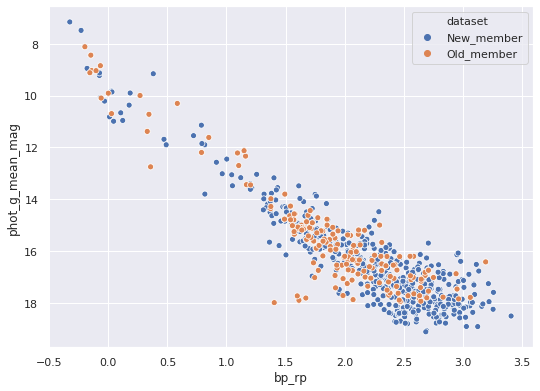

In [14]:
sns.set(rc={'figure.figsize':(8.7,6.27)})

cmd = sns.scatterplot(x='bp_rp', y='phot_g_mean_mag', data=concatenated,
                hue='dataset')
cmd.invert_yaxis()

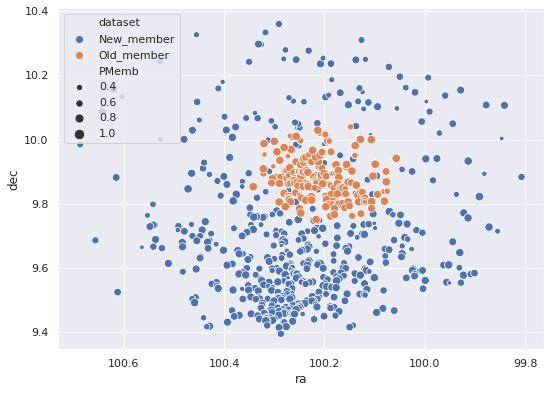

In [15]:
skyplot = sns.scatterplot(x='ra', y='dec', data=concatenated,
                size='PMemb', hue='dataset')
skyplot.invert_xaxis()

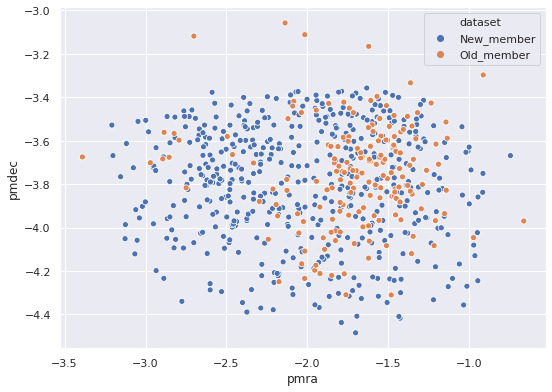

In [18]:
# proper motion plot

sns.scatterplot(x='pmra', y='pmdec', data=concatenated,
                size='PMemb', hue='dataset')

In [0]:
# pd_prof.ProfileReport(potentialMember)

In [0]:
import time
time.sleep(60)

In [0]:
files.download('NGC_2264_cantat.csv')
files.download('NGC_2264_membership_prob.csv')